# Rendu Hipeau Kévin 
Ne pas oublié d'installer graphviz  pour windows !!!!

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from bs4 import BeautifulSoup
import requests
import re
import urllib2
import os
import cookielib
import json
import time
from collections import Counter

In [2]:
i = Image.open('banane.png')
iar = np.asarray(i)
plt.imshow(iar)
plt.show()

IOError: [Errno 2] No such file or directory: 'banane.png'

Configuration

In [3]:
class Type:
    count = 0
    def __init__(self,name,option):
        self.query = name
        self.option = option
        self.id = Type.count
        Type.count = Type.count +1


types = []
types.append(Type("banana","yellow",""))
types.append(Type("kiwi","green"))
types.append(Type("apple fruit",""))
types.append(Type("tomato","red"))
types.append(Type("pasteque","green"))
#types.append(Type("melon","green"))
types.append(Type("cerise","red"))
types.append(Type("courgette","green"))
types.append(Type("carrotte","orange"))



In [ ]:
def get_soup(url,header):
    return BeautifulSoup(urllib2.urlopen(urllib2.Request(url,headers=header)),'html.parser')



def download(): 
    for currentType in range(0,len(types)+1):
        print currentType
        query= types[currentType].query.split()
        query='+'.join(query)
        url="https://www.google.fr/search?q="+query+"&source=lnms&tbm=isch&tbs=ic:specific,isc:"+types[currentType].option
        url="https://www.google.fr/search?safe=off&sa=G&hl=fr&tbs=simg:CAESuQIJyN74dJUufBUarQILEKjU2AQaAggLDAsQsIynCBpiCmAIAxIosgHXBtES1ga-ArMB8gb7BdkG9xL6M-s0kSKQKaU0pzTLKJc1lSLtNBowh1PNHrwTUb64ZJ2FwcaGVbmoUzlNEbh-G7abuI4ZY6jFv4etFTgnJqVGiQrQ-0c4IAQMCxCOrv4IGgoKCAgBEgQ0QURGDAsQne3BCRqaAQogCg1iYW5hbmEgZmFtaWx52qWI9gMLCgkvbS8wMTN4azYKGAoGYmFuYW5h2qWI9gMKCggvbS8wOXFjawoiChBjb29raW5nIHBsYW50YWlu2qWI9gMKCggvbS8wOXFkZAofCgtzYWJhIGJhbmFuYdqliPYDDAoKL20vMGc1cHpoXwoXCgVmcnVpdNqliPYDCgoIL20vMDJ4d2IM&q=banane+png&tbm=isch&ved=0ahUKEwi71dvR57DSAhXSSxoKHbBFARgQsw4ILA&biw=1745&bih=841"
        print url
        #add the directory for your image here
        DIR="img"
        header={'User-Agent':"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/43.0.2357.134 Safari/537.36"
        }
        soup = get_soup(url,header) #by stack


        ActualImages=[]
        for a in soup.find_all("div",{"class":"rg_meta"}):
            link , Type =json.loads(a.text)["ou"]  ,json.loads(a.text)["ity"]
            ActualImages.append((link,Type))

        print  "there are total" , len(ActualImages),"images"

        if not os.path.exists(DIR):
                    os.mkdir(DIR)
        if not os.path.exists(DIR):
                    os.mkdir(DIR)
        cntr = 0
        for i , (img , Type) in enumerate( ActualImages):
            try:
                req = urllib2.Request(img, headers={'User-Agent' : header})
                raw_img = urllib2.urlopen(req).read()
                if len(Type)==3:
                    cntr = cntr + 1
                    f = open(os.path.join(DIR ,"big"+str(types[currentType].id)+"."+ str(cntr)+".jpg"), 'wb')
                    f.write(raw_img)
                    f.close()
                    size = 128,128
                    im = Image.open("img/big"+str(types[currentType].id)+"."+ str(cntr)+".jpg")
                    im.thumbnail(size, Image.ANTIALIAS)
                    im.save("img/"+str(types[currentType].id)+"."+ str(cntr)+".jpg", "JPEG")



            except Exception as e:
                print "could not load : "+img
                print e
download()


0
https://www.google.fr/search?safe=off&sa=G&hl=fr&tbs=simg:CAESuQIJyN74dJUufBUarQILEKjU2AQaAggLDAsQsIynCBpiCmAIAxIosgHXBtES1ga-ArMB8gb7BdkG9xL6M-s0kSKQKaU0pzTLKJc1lSLtNBowh1PNHrwTUb64ZJ2FwcaGVbmoUzlNEbh-G7abuI4ZY6jFv4etFTgnJqVGiQrQ-0c4IAQMCxCOrv4IGgoKCAgBEgQ0QURGDAsQne3BCRqaAQogCg1iYW5hbmEgZmFtaWx52qWI9gMLCgkvbS8wMTN4azYKGAoGYmFuYW5h2qWI9gMKCggvbS8wOXFjawoiChBjb29raW5nIHBsYW50YWlu2qWI9gMKCggvbS8wOXFkZAofCgtzYWJhIGJhbmFuYdqliPYDDAoKL20vMGc1cHpoXwoXCgVmcnVpdNqliPYDCgoIL20vMDJ4d2IM&q=banane+png&tbm=isch&ved=0ahUKEwi71dvR57DSAhXSSxoKHbBFARgQsw4ILA&biw=1745&bih=841
there are total 100 images
could not load : http://www.capri-sonne.com/fileadmin/froodokoo/resources/common/images/info/banane.png
cannot write mode P as JPEG
could not load : http://pngsammlung.com/images/fruits/banana/banana-11.png
cannot write mode P as JPEG
could not load : http://lesillonfruitsec.fr/wp-content/uploads/2014/09/Banane.png
cannot write mode P as JPEG
could not load : http://static.caresseantillaise.com/wp-cont

In [4]:
def threshold(imageArray):
    balanceAr = []
    newAr = imageArray
    for eachRow in imageArray:
        for eachPix in eachRow:
            avgNum = reduce(lambda x, y: x + y, eachPix[:3]) / len(eachPix[:3])
            balanceAr.append(avgNum)
    balance = reduce(lambda x, y: x + y, balanceAr) / len(balanceAr)
    for eachRow in newAr:
        for eachPix in eachRow:
            if reduce(lambda x, y: x + y, eachPix[:3]) / len(eachPix[:3]) > balance:
                eachPix[0] = 255
                eachPix[1] = 255
                eachPix[2] = 255                 
            else:
                eachPix[0] = 0
                eachPix[1] = 0
                eachPix[2] = 0
               
    return newAr

c:\python27\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: overflow encountered in ubyte_scalars
c:\python27\lib\site-packages\ipykernel\__main__.py:11: RuntimeWarning: overflow encountered in ubyte_scalars


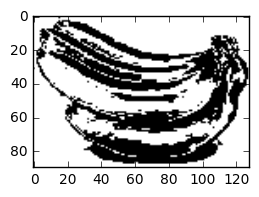

In [6]:
i = Image.open('img/0.1.jpg')
iar = np.array(i)



iar = threshold(iar) #testr avec balance des des couleurs


fig = plt.figure()
ax1 = plt.subplot2grid((8,6),(0,0), rowspan=4, colspan=3)


ax1.imshow(iar)



plt.show()

In [156]:
def transform():
    
    numbersWeHave = range(1,len(types))
    numberPerType = range(1,25)
    for eachNum in numbersWeHave:
        #print eachNum
        for furtherNum in numberPerType:
            try:
                print(str(eachNum)+'.'+str(furtherNum))
                numberArrayExamples = open('numAr.txt','a')
                imgFilePath = 'img/'+str(eachNum)+'.'+str(furtherNum)+'.jpg'
                ei = Image.open(imgFilePath)
                eiar = np.array(ei)
                eiarl = str(eiar.tolist())
                lineToWrite = str(eachNum)+'::'+eiarl+'\n'
                numberArrayExamples.write(lineToWrite)
                numberArrayExamples.close()
                ei.close()
                del ei
                del eiar
                del eiarl
            except Exception as e:
                print e
transform()

1.1
1.2
1.3
1.4
1.5
1.6
1.7
1.8
1.9
1.10
1.11
1.12
1.13
1.14
1.15
1.16
1.17
1.18
1.19
1.20
1.21
1.22
1.23
1.24
2.1
cannot identify image file 'img/2.1.jpg'
2.2
2.3
2.4
2.5
2.6
2.7
2.8
2.9
2.10
2.11
2.12
2.13
2.14
2.15
2.16
2.17
2.18
2.19
2.20
2.21
2.22
2.23
2.24
3.1
3.2
3.3
3.4
3.5
3.6
3.7
3.8
3.9
3.10
3.11
3.12
3.13
3.14
3.15
3.16
3.17
3.18
3.19
3.20
3.21
3.22
3.23
3.24
4.1
4.2
4.3
4.4
4.5
4.6
4.7
4.8
cannot identify image file 'img/4.8.jpg'
4.9
4.10
4.11
4.12
4.13
4.14
4.15
4.16
4.17
4.18
4.19
4.20
4.21
4.22
4.23
4.24
5.1
5.2
5.3
5.4
5.5
5.6
5.7
5.8
5.9
5.10
5.11
5.12
5.13
5.14
5.15
5.16
5.17
5.18
5.19
5.20
5.21
5.22
5.23
5.24
6.1
6.2
6.3
6.4
6.5
6.6
6.7
6.8
cannot identify image file 'img/6.8.jpg'
6.9
6.10
6.11
6.12
6.13
6.14
6.15
6.16
6.17
6.18
6.19
6.20
6.21
6.22
6.23
6.24
7.1
7.2
7.3
7.4
7.5
7.6
7.7
7.8
7.9
7.10
7.11
7.12
7.13
7.14
7.15
7.16
7.17
cannot identify image file 'img/7.17.jpg'
7.18
7.19
7.20
7.21
7.22
7.23
7.24
8.1
8.2
8.3
8.4
8.5
[Errno 2] No such file or directory: '

In [20]:

def percentage(part, whole):
    return 100 * float(part)/float(whole)
def whatNumIsImg(filePath):

    matchedAr = []
    loadExamps = open('numAr.txt','r').read()
    loadExamps = loadExamps.split('\n')
    
    i = Image.open(filePath)
    iar = np.array(i)
    iarl = iar.tolist()

    inQuestion = str(iarl)

    for eachExample in loadExamps:
        try:
            splitEx = eachExample.split('::')
            currentNum = splitEx[0]
            currentAr = splitEx[1]
            
            eachPixEx = currentAr.split('],')
            eachPixInQ = inQuestion.split('],')

            x = 0

            while x < len(eachPixEx):
                if eachPixEx[x] == eachPixInQ[x]:
                    matchedAr.append(int(currentNum))

                x+=1
        except Exception as e:
            e
            
            
    print matchedAr          
    x = Counter(matchedAr)
    #print reduce(lambda x, y: x + y, x) / len(x)
    callSum = 0
    for z in range(0,len(types)-1):
        callSum += x[z+1]
    for z in range(0,len(types)-1):
        print types[z].query + "  "+  str(percentage(x[z+1],callSum))
    

whatNumIsImg('img/7.9.jpg')

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 